In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [4]:
def Euler_method(matrix,inter, D):
    dt = 0.1
    T = 0
    for t in range(inter):
        for x in range(1,len(matrix)-1):
            for y in range(1,len(matrix)-1):
                matrix[x][y] = (matrix[x][y] + D*(T+dt)*((matrix[x-1][y]+matrix[x+1][y]+matrix[x][y-1]+matrix[x][y+1]-4*matrix[x][y])))
    return matrix

In [5]:
#gota_inicial = set_boundary(grid, size, width, thick, pot,pot2)

gota_inicial = np.zeros((80,80))
gota_inicial[30:50,30:50] = 20

inter = 1500
D = 0.5
gota_final = Euler_method(gota_inicial, inter, D)

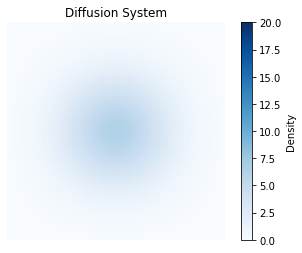

In [6]:
f1, ax1 = plt.subplots()


picture = ax1.imshow(gota_final,vmin=0,vmax =20 ,interpolation='none', cmap='Blues')
ax1.axis('off')
ax1.set_title('Diffusion System')
f1.colorbar(picture, label = "Density")
#plt.savefig('diffusion_1500inter.png')
plt.show()

In [7]:
def Euler_method_density(matrix,inter, D, t):
    dt = 0.1
    T = 0
    for x in range(1,len(matrix)-1):
        for y in range(1,len(matrix)-1):
            matrix[x][y] = (matrix[x][y] + D*(T+dt)*((matrix[x-1][y]+matrix[x+1][y]+matrix[x][y-1]+matrix[x][y+1]-4*matrix[x][y])))
    return np.std(matrix)

In [96]:
gota_inicial2 = set_boundary(grid, size, width, thick, pot,pot2)
standard = []
inter = 3000
for t in range(inter):
    k = Euler_method_density(gota_inicial2, inter, 1.6, t)
    standard.append(k)

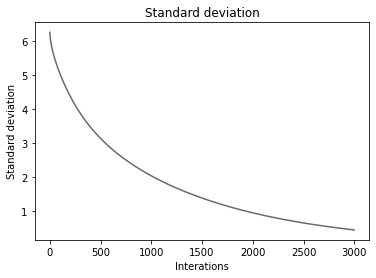

In [97]:
t = [i for i in range(len(standard))]
plt.plot(t,standard,color = 'dimgrey')
plt.title("Standard deviation")
plt.xlabel("Interations")
plt.ylabel("Standard deviation")
plt.savefig("standard_deviation.png")
plt.show()

### Gray-Scott Reaction Simulation

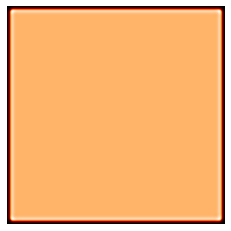

In [23]:
def du_dt(f):
    df = Du*convolve2d(f, maske, mode="same") - v*v*u + F*(1.0 - u)
    return df

def dv_dt(f):
    df = Dv*convolve2d(f, maske, mode="same") + v*v*u - (F+k)*v
    return df

maske = np.array([[0, 1, 0], 
                  [1, -4, 1], 
                  [0, 1, 0]])


#parameters setting
F = 0.035                #feed rate
k = 0.045               #kill rate

Du, Dv = 0.16, 0.08     #diffusion coefficients
L = 252                 #fig dimention

u = np.zeros((L, L))
u2 = np.zeros((L, L))
v = np.zeros((L, L))
v2 = np.zeros((L, L))

#initial condition
u[L//2-6:L//2+6, L//2-6:L//2+6] = 1.0
v[L//2-3:L//2+3, L//2-3:L//2+3] = 1.0

iterations = 10000      #number of iterarion 
dt = 1.0                #step
for i in range(iterations):
    if i % 2 == 0:
        u2[:] = u + du_dt(u)* dt
        v2[:] = v + dv_dt(v)* dt
    else:
        u[:] = u2 + du_dt(u2)* dt
        v[:] = v2 + dv_dt(v2)* dt


#show the image
fig, ax = plt.subplots()
ax.imshow(v, cmap= 'gist_heat')
ax.set_axis_off()
plt.savefig('f_0035_k_0045.png')

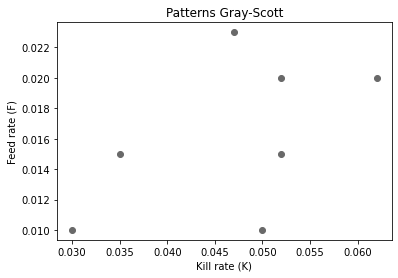

In [21]:
feed_rate = [0.02,0.02,0.01,0.01,0.015,0.015,0.023]
kill_rate = [0.052,0.062,0.05,0.03,0.035,0.052,0.047]
plt.scatter(kill_rate, feed_rate, color = 'dimgrey')
plt.xlabel("Kill rate (K)")
plt.ylabel("Feed rate (F)")
plt.title("Patterns Gray-Scott")
plt.savefig('gray_scott.png')
plt.show()